# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

Text(0.5, 1.0, 'Initial data')

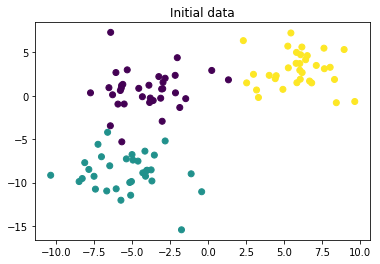

In [35]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [2]:
from scipy.spatial import distance
from sklearn import metrics
import random
import numpy as np

In [3]:
def get_min_distances(x_test_record, x_train, k):    
    distances = list()
    for i in range(len(x_train)):        
        dst = distance.euclidean(x_test_record, x_train[i])
        distances.append([i,dst])  
    distances = sorted(distances,key=lambda x: x[1])         
    return distances[:k]

In [30]:
def predict_class(x_train,y_train,x_test,k):
    min_distances = get_min_distances(x_test,x_train,k)
    k_classes = list()
    indexes = list(map(list, zip(*min_distances)))[0]
    for i in range(len(y_train)): 
        if i in indexes:
            k_classes.append(y_train[i])     
    if len(set(k_classes)) != len(k_classes):
        return max(set(k_classes), key=k_classes.count)
    else:
        return random.choice(k_classes)       

In [19]:
def funct_kNN(x_train, y_train, x_test, k):
    y_pred = list()
    correct_prediction = 0
    for x_test_item in x_test:                   
        predicted_class = predict_class(x_train, y_train, x_test_item, k)
        y_pred.append(predicted_class)
    return np.array(y_pred)

Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

y_pred_k_1 = funct_kNN(X_train, y_train, X_test, 1)
y_pred_k_3 = funct_kNN(X_train, y_train, X_test, 3)
y_pred_k_5 = funct_kNN(X_train, y_train, X_test, 5)
y_pred_k_7 = funct_kNN(X_train, y_train, X_test, 7)
y_pred_k_9 = funct_kNN(X_train, y_train, X_test, 9)

In [41]:
print(f"Точность для k=1: {int(round(metrics.accuracy_score(y_pred_k_1, y_test)*100))}%")
print(f"Точность для k=3: {int(round(metrics.accuracy_score(y_pred_k_3, y_test)*100))}%")
print(f"Точность для k=5: {int(round(metrics.accuracy_score(y_pred_k_5, y_test)*100))}%")
print(f"Точность для k=7: {int(round(metrics.accuracy_score(y_pred_k_7, y_test)*100))}%")
print(f"Точность для k=9: {int(round(metrics.accuracy_score(y_pred_k_9, y_test)*100))}%")

Точность для k=1: 97%
Точность для k=3: 97%
Точность для k=5: 100%
Точность для k=7: 100%
Точность для k=9: 100%


Постройте разделающие поверхности, которые строит классификатор

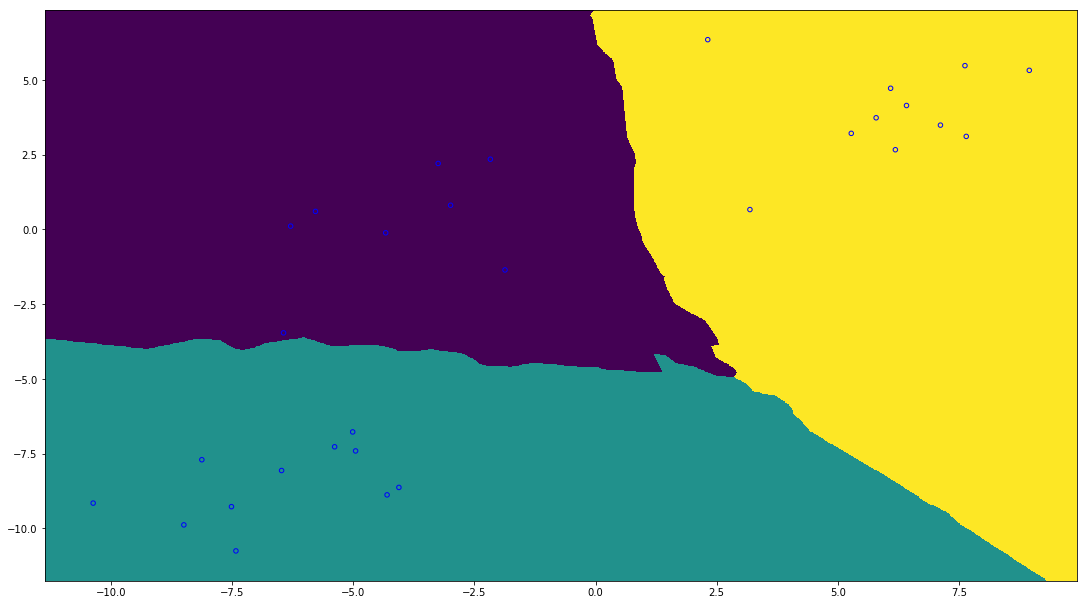

In [42]:
h = .02      
    
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))             

Z = funct_kNN(X_train,y_train,np.c_[xx.ravel(), yy.ravel()],9)
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test,edgecolor='b', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.gcf().set_size_inches(18.5, 10.5)

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

In [5]:
def kNN_regression(x_train, y_train, x_test, k):
    y_test = list()
    correct_prediction = 0
    for x_test_record in x_test:    
        k_values = list()
        indexes = np.array(list(map(list, zip(*get_min_distances(x_test_record,x_train,k))))[0])    
        for i in range(len(y_train)):            
            if i in indexes:
                k_values.append(y_train[i])                         
        predicted_value = np.average(k_values)
        y_test.append(predicted_value)
    return np.array(y_test)

In [6]:
fs = 5
f = 5
x = np.arange(fs*1000)/1000 
y = [ np.sin(2*np.pi*f * (i/fs)) for i in x]

In [7]:
x_regression_train = np.empty((0, 1))
y_regression_train = np.empty((0, 1))

for i in np.random.randint(5000, size=10):
    x_regression_train = np.append(x_regression_train, [x[i]])
    y_regression_train = np.append(y_regression_train, [y[i]])    

Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.

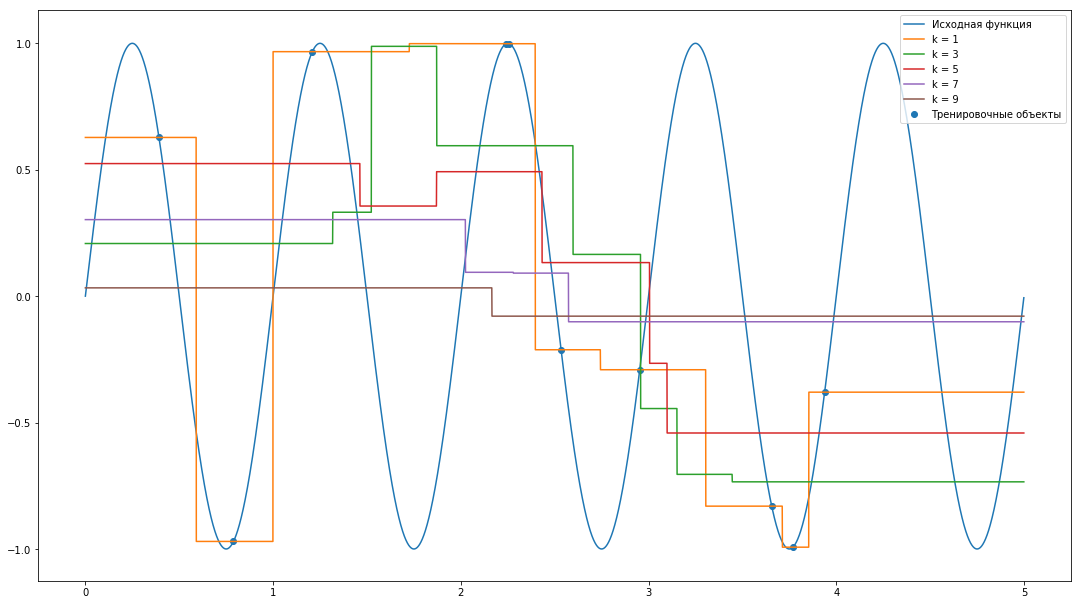

In [9]:
plt.plot(x, y,label = 'Исходная функция')
plt.scatter(x_regression_train, y_regression_train,label = 'Тренировочные объекты')

for k in [1,3,5,7,9]:
    plt.plot(x,funct_kNN_regressor(x_regression_train,y_regression_train,x,k), label='k = %d' % k)
    
plt.legend()
plt.gcf().set_size_inches(18.5, 10.5)